In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
# Load the Medical Tourism DataSet.csv dataset using pandas
df = pd.read_csv('/content/cwurData.csv')
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [15]:
# Remove rows with NaN or null values
df.dropna(inplace=True)
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [16]:
df.keys()

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with null values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new file
df.to_csv('cleaned.csv', index=False)

In [18]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
1,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
2,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
3,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
4,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
1996,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
1997,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
1998,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [19]:
# Extract relevant columns for bibliographic connections
df_citations = df[['country', 'citations']]

unique_nodes = set(df['country']).union(set(df['citations']))
print(unique_nodes)

# Create an empty directed graph
graph = nx.DiGraph()

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 'Greece', 'Lithuania', 25, 26, 27, 'Puerto Rico', 28, 29, 30, 31, 32, 34, 35, 36, 'Switzerland', 37, 38, 39, 42, 43, 44, 'Chile', 'United Arab Emirates', 45, 46, 48, 52, 53, 55, 'Hungary', 59, 60, 61, 65, 'Israel', 68, 69, 'Malaysia', 73, 75, 76, 78, 79, 'Canada', 81, 82, 'Uruguay', 87, 88, 93, 609, 99, 'Singapore', 101, 'Iran', 107, 114, 115, 125, 128, 'Hong Kong', 130, 645, 134, 136, 146, 150, 'USA', 'Czech Republic', 159, 161, 176, 182, 'Austria', 'Finland', 187, 'Saudi Arabia', 197, 200, 'Australia', 'Ireland', 'Taiwan', 212, 'Denmark', 220, 'Germany', 234, 'Slovenia', 250, 'South Korea', 264, 'Poland', 283, 287, 800, 'Egypt', 812, 310, 'Spain', 'Estonia', 321, 'Italy', 'Bulgaria', 'Uganda', 'Argentina', 'Netherlands', 'Cyprus', 'Slovak Republic', 'Belgium', 'Japan', 363, 'France', 'Iceland', 368, 'Mexico', 'South Africa', 'United Kingdom', 406, 'Sweden', 'Thailand', 'Portugal', 428, 'Turkey', 'Indi

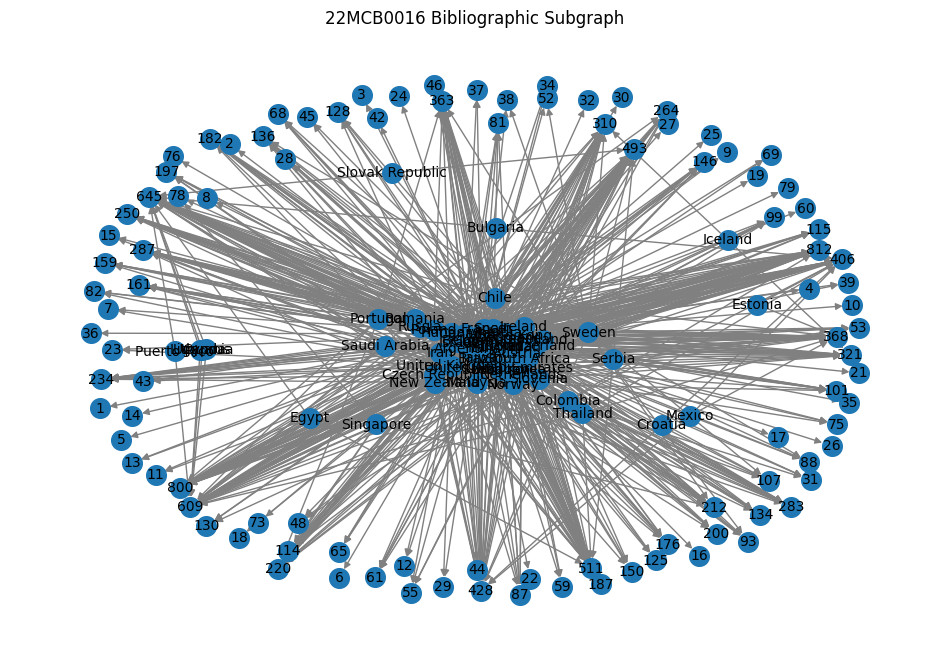

In [20]:
# Add nodes to the graph
for _, row in df_citations.iterrows():
    paper_title = row['country']
    citation = row['citations']

    # Add paper title as a node
    graph.add_node(paper_title)

    # Add citation as a node
    graph.add_node(citation)

    # Add edge between paper title and citation
    graph.add_edge(paper_title, citation)

# Visualize the graph
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 8))
nx.draw_networkx(graph, pos, with_labels=True, node_size=200, font_size=10, edge_color='gray')
plt.title('22MCB0016 Bibliographic Subgraph')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


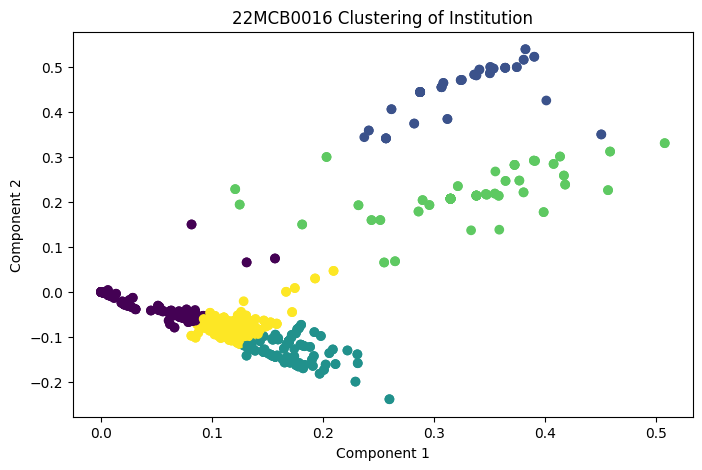

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
# Extract node features (number of topics or papers)
node_features = np.array([len(graph[node]) for node in graph.nodes()]).reshape(-1, 1)

# Remove rows with NaN or null values
df.dropna(inplace=True)

# Select relevant features for clustering (e.g., abstracts)
data = df['institution'].tolist()

# Vectorize the abstracts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

# Reduce dimensionality using Truncated SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis')
plt.title('22MCB0016 Clustering of Institution')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

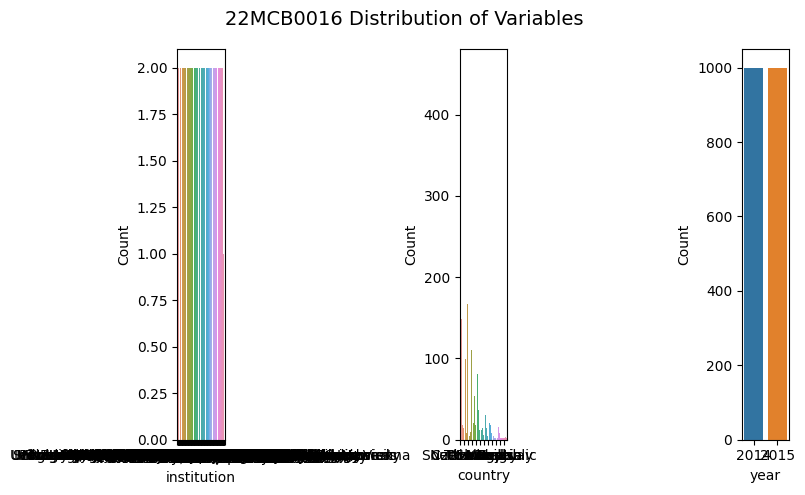

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to evaluate institution on
columns_to_evaluate = ['institution', 'country', 'year']

fig, axes = plt.subplots(1, len(columns_to_evaluate), figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(columns_to_evaluate):
    g = sns.countplot(x=col, data=df, ax=axes[i])
    if len(df[col].unique()) > 5:
        g.set_xticks(range(0, len(df[col].unique()), 5))
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.suptitle('22MCB0016 Distribution of Variables', fontsize=14)
plt.tight_layout()
plt.show()